# Tutorials

In [28]:
%matplotlib

Using matplotlib backend: Qt5Agg


## Image Segmentation

Text(0.5, 1.0, 'histogram of gray values')

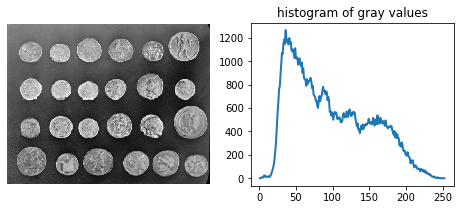

In [29]:
# compare edge-based to region-based segmentation

import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.exposure import histogram

coins = data.coins()
hist, hist_centers = histogram(coins)

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(coins, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')

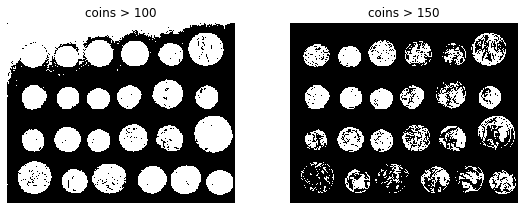

In [30]:
# thresholds
fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

axes[0].imshow(coins > 100, cmap=plt.cm.gray)
axes[0].set_title('coins > 100')

axes[1].imshow(coins > 150, cmap=plt.cm.gray)
axes[1].set_title('coins > 150')

for a in axes:
    a.axis('off')

plt.tight_layout()

(-0.5, 383.5, 302.5, -0.5)

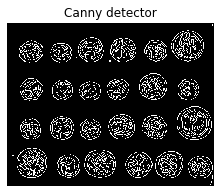

In [31]:
# edge-based

from skimage.feature import canny

edges = canny(coins)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(edges, cmap=plt.cm.gray)
ax.set_title('Canny detector')
ax.axis('off')

(-0.5, 383.5, 302.5, -0.5)

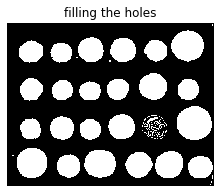

In [32]:
# contour fill using morphology

from scipy import ndimage as ndi

fill_coins = ndi.binary_fill_holes(edges)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(fill_coins, cmap=plt.cm.gray)
ax.set_title('filling the holes')
ax.axis('off')

(-0.5, 383.5, 302.5, -0.5)

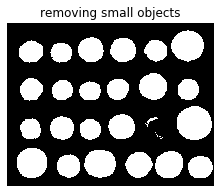

In [33]:
# removing small spurious objects with minimum size
from skimage import morphology

coins_cleaned = morphology.remove_small_objects(fill_coins, 21)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(coins_cleaned, cmap=plt.cm.gray)
ax.set_title('removing small objects')
ax.axis('off')